<h1>Predict House Prices</h1>

<hr>

### Acknowledgements

The **Ames Housing dataset** was compiled by **Dean De Cock** for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset.

### About

In this project **Ames Housing dataset**  is used, which has **79 features** and 1 target variable i.e. SalePrice(house prices) and did **feature engineering** to see which features are relevant in predicting the house price and created a **machine learning model** which will take relevant features(selected while feature engineering) as input and give prediction of what might be the price of that house as output.

### Data Source

This dataset can found in Kaggle - [Source](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

<hr>

In [1]:
# To avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

data = pd.read_csv('data.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Description


* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

In [3]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
y_df = data[['SalePrice']]

from sklearn.preprocessing import MinMaxScaler
data.SalePrice = MinMaxScaler().fit_transform(data.SalePrice.values.reshape(-1, 1))

# Just for good comparasion between features and traget variables
# I have scaled SalePrice column in the dataframe, but while creating 
# the machine learning model I have used the not scaled SalePrice data 
# (which is stored in the y_df variable), this will have no effect on 
# the model since features will be used for prediction and not the 
# target variable and all computational effects depends on features.

<hr>

## Dealing with outliers

In [6]:
# Getting all columns having numerical data
ol_df = data.loc[:, (data.dtypes == np.float64) | (data.dtypes == np.int64)]
ol_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,0.241078
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,0.203583
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,0.261908
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,0.145952
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,0.298709


In [7]:
ol_df = ol_df.fillna(999)
ol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [8]:
# Z-Score
z = np.abs(stats.zscore(ol_df))
threshold = 3

# print(np.where(z > threshold))

# The first array contains the list of row numbers 
# where Z-Score is > 3 and second array respective 
# column numbers.

In [9]:
# InterQuartile Range
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Id                729.500000
MSSubClass         50.000000
LotFrontage        21.000000
LotArea          4048.000000
OverallQual         2.000000
OverallCond         1.000000
YearBuilt          46.000000
YearRemodAdd       37.000000
MasVnrArea        166.000000
BsmtFinSF1        712.250000
BsmtFinSF2          0.000000
BsmtUnfSF         585.000000
TotalBsmtSF       502.500000
1stFlrSF          509.250000
2ndFlrSF          728.000000
LowQualFinSF        0.000000
GrLivArea         647.250000
BsmtFullBath        1.000000
BsmtHalfBath        0.000000
FullBath            1.000000
HalfBath            1.000000
BedroomAbvGr        1.000000
KitchenAbvGr        0.000000
TotRmsAbvGrd        2.000000
Fireplaces          1.000000
GarageYrBlt        41.000000
GarageCars          1.000000
GarageArea        241.500000
WoodDeckSF        168.000000
OpenPorchSF        68.000000
EnclosedPorch       0.000000
3SsnPorch           0.000000
ScreenPorch         0.000000
PoolArea            0.000000
MiscVal       

In [10]:
# print(ol_df < (Q1 - 1.5 * IQR)) |(ol_df > (Q3 + 1.5 * IQR))

# Here False indicates that value is normal while True
# indicates that the value is an outlier.

In [11]:
# Removing rows whose Z-Score >= 3
ol_df = ol_df[(z < 3).all(axis=1)]

In [12]:
# Removing rows who will be indicated as an outlier by IQR scores.
ol_df = ol_df[~((ol_df < (Q1 - 1.5 * IQR)) |(ol_df > (Q3 + 1.5 * IQR))).any(axis=1)]
ol_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432 entries, 0 to 1455
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             432 non-null    int64  
 1   MSSubClass     432 non-null    int64  
 2   LotFrontage    432 non-null    float64
 3   LotArea        432 non-null    int64  
 4   OverallQual    432 non-null    int64  
 5   OverallCond    432 non-null    int64  
 6   YearBuilt      432 non-null    int64  
 7   YearRemodAdd   432 non-null    int64  
 8   MasVnrArea     432 non-null    float64
 9   BsmtFinSF1     432 non-null    int64  
 10  BsmtFinSF2     432 non-null    int64  
 11  BsmtUnfSF      432 non-null    int64  
 12  TotalBsmtSF    432 non-null    int64  
 13  1stFlrSF       432 non-null    int64  
 14  2ndFlrSF       432 non-null    int64  
 15  LowQualFinSF   432 non-null    int64  
 16  GrLivArea      432 non-null    int64  
 17  BsmtFullBath   432 non-null    int64  
 18  BsmtHalfB

<hr>

# Analyzing Numercial Data

In [13]:
# DataFrame containing numerical data and our target(SalePrice)
df = ol_df.copy()
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,0.241078
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,0.261908
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,0.298709
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2004.0,2,636,255,57,0,0,0,0,0,8,2007,0.377864
10,11,20,70.0,11200,5,5,1965,1965,0.0,906,0,134,1040,1040,0,0,1040,1,0,1,0,3,1,5,0,1965.0,1,384,0,0,0,0,0,0,0,2,2008,0.131371


#### Id

In [14]:
df.drop(['Id'], axis='columns', inplace=True)

#### MSSubClass

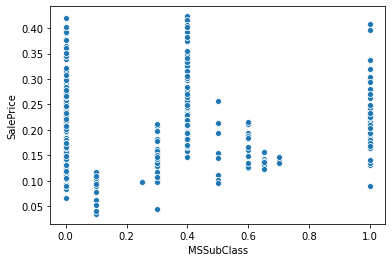

In [15]:
df.MSSubClass = MinMaxScaler().fit_transform(df.MSSubClass.values.reshape(-1, 1))
sns.scatterplot(x='MSSubClass', y='SalePrice', data=df)
df.drop(['MSSubClass'], axis='columns', inplace=True)

#### LotFrontage | LotArea

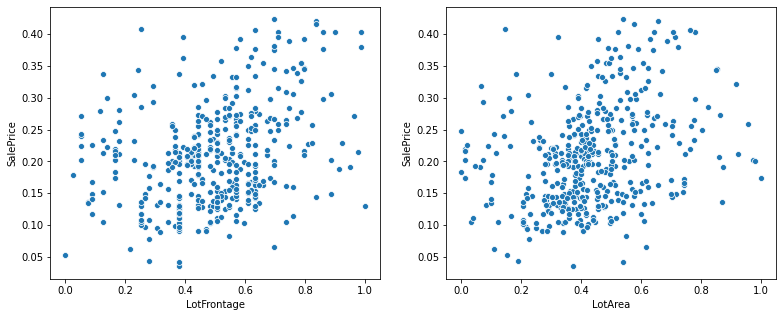

In [16]:
df.LotFrontage = MinMaxScaler().fit_transform(df.LotFrontage.values.reshape(-1, 1))
df.LotArea = MinMaxScaler().fit_transform(df.LotArea.values.reshape(-1, 1))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

sns.scatterplot(x='LotFrontage', y='SalePrice', data=df, ax=ax[0])
sns.scatterplot(x='LotArea', y='SalePrice', data=df, ax=ax[1])

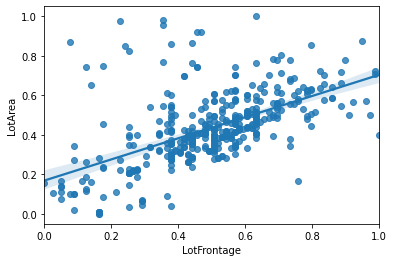

In [17]:
# Correlation between LotFrontage and LotArea
sns.regplot(x='LotFrontage', y='LotArea', data=df)

# LotArea and LotFrontage shows positive correlation
df.drop(['LotFrontage'], axis='columns', inplace=True)

#### OverallQual | OverallCond

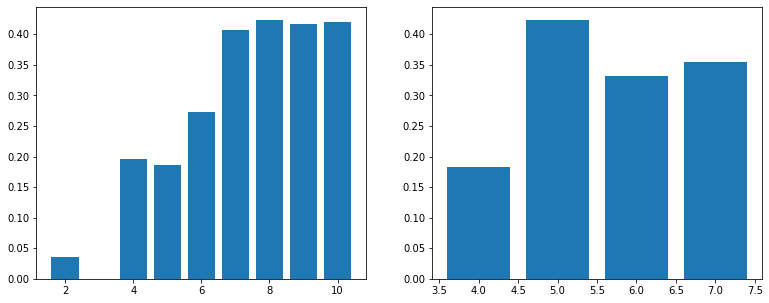

In [18]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
ax1.bar(df.OverallQual, df.SalePrice)
ax2.bar(df.OverallCond, df.SalePrice)

new_values = {
    2: 0,
    5: 1,
    4: 2,
    6: 3,
    7: 4,
    8: 7,
    9: 5,
    10: 6
}
df.OverallQual = df.OverallQual.apply(lambda x: new_values[x])

new_values = {
    4: 0,
    6: 1,
    7: 2,
    5: 3
}
df.OverallCond = df.OverallCond.apply(lambda x: new_values[x])

#### YearBuilt | YearRemodAdd

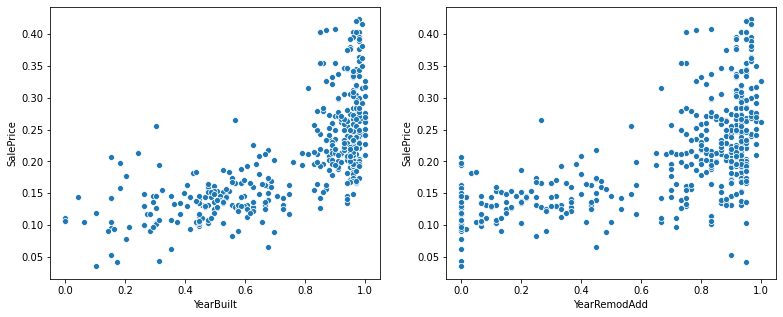

In [19]:
df.YearBuilt = MinMaxScaler().fit_transform(df.YearBuilt.values.reshape(-1, 1))
df.YearRemodAdd = MinMaxScaler().fit_transform(df.YearRemodAdd.values.reshape(-1, 1))

f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

sns.scatterplot(x='YearBuilt', y='SalePrice', data=df, ax=ax1)
sns.scatterplot(x='YearRemodAdd', y='SalePrice', data=df, ax=ax2)

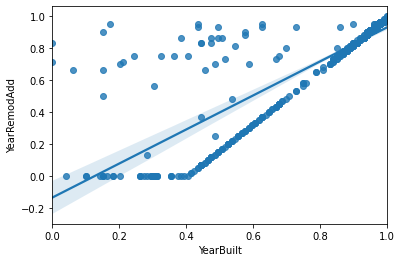

In [20]:
# Correlation between YearBuilt and YearRemodAdd
sns.regplot(x='YearBuilt', y='YearRemodAdd', data=df)

# YearBuilt and YearRemodAdd shows positive correlation
df.drop(['YearBuilt'], axis='columns', inplace=True)

#### MasVnrArea

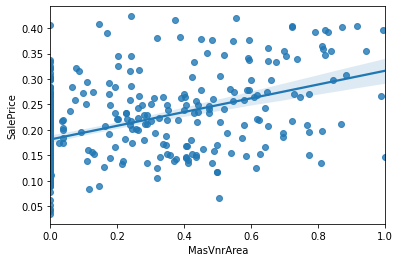

In [21]:
df.MasVnrArea = MinMaxScaler().fit_transform(df.MasVnrArea.values.reshape(-1, 1))
sns.regplot(x='MasVnrArea', y='SalePrice', data=df)

#### BsmtFinSF1 | BsmtFinSF2 | BsmtUnfSF | TotalBsmtSF

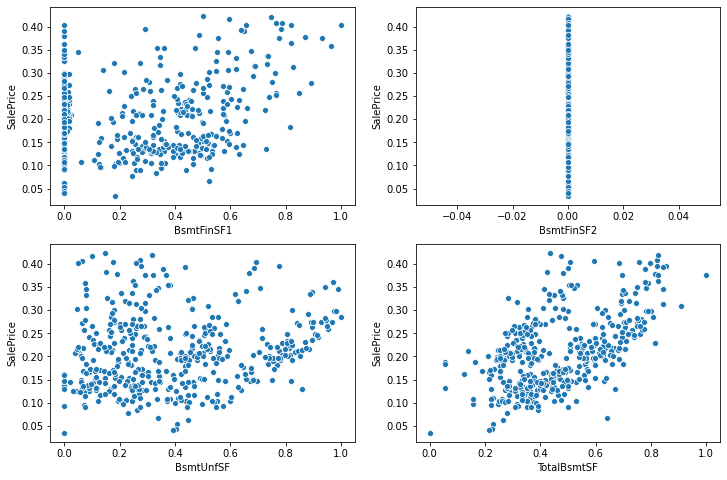

In [22]:
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

df.BsmtFinSF1 = MinMaxScaler().fit_transform(df.BsmtFinSF1.values.reshape(-1, 1))
df.BsmtFinSF2 = MinMaxScaler().fit_transform(df.BsmtFinSF2.values.reshape(-1, 1))
df.BsmtUnfSF = MinMaxScaler().fit_transform(df.BsmtUnfSF.values.reshape(-1, 1))
df.TotalBsmtSF = MinMaxScaler().fit_transform(df.TotalBsmtSF.values.reshape(-1, 1))

sns.scatterplot(x='BsmtFinSF1', y='SalePrice', data=df, ax=ax[0, 0])
sns.scatterplot(x='BsmtFinSF2', y='SalePrice', data=df, ax=ax[0, 1])
sns.scatterplot(x='BsmtUnfSF', y='SalePrice', data=df, ax=ax[1, 0])
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df, ax=ax[1, 1])

In [23]:
df.drop(['BsmtFinSF2'], axis='columns', inplace=True)

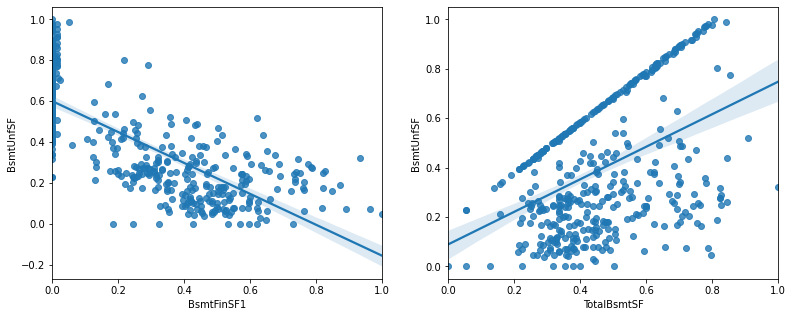

In [24]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

# Correlation between BsmtFinSF1 and BsmtUnfSF
sns.regplot(x='BsmtFinSF1', y='BsmtUnfSF', data=df, ax=ax[0])

# Correlation between TotalBsmtSF and BsmtUnfSF
sns.regplot(x='TotalBsmtSF', y='BsmtUnfSF', data=df, ax=ax[1])

# BsmtFinSF1 and BsmtUnfSF high correlation
df.drop(['BsmtFinSF1'], axis='columns', inplace=True)

# BsmtFinSF1 and BsmtUnfSF high correlation
df.drop(['TotalBsmtSF'], axis='columns', inplace=True)

#### 1stFlrSF | 2ndFlrSF | LowQualFinSF

Unique values in LowQualFinSF: [0]


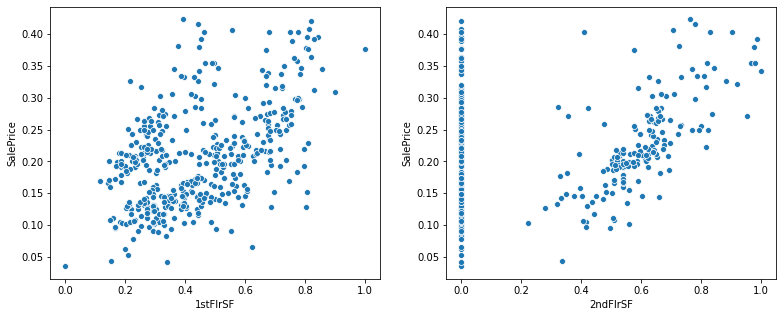

In [25]:
df['1stFlrSF'] = MinMaxScaler().fit_transform(df['1stFlrSF'].values.reshape(-1, 1))
df['2ndFlrSF'] = MinMaxScaler().fit_transform(df['2ndFlrSF'].values.reshape(-1, 1))

f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

sns.scatterplot(x='1stFlrSF', y='SalePrice', data=df, ax=ax1)
sns.scatterplot(x='2ndFlrSF', y='SalePrice', data=df, ax=ax2)

print(f'Unique values in LowQualFinSF: {df.LowQualFinSF.unique()}')
df.drop(['LowQualFinSF'], axis='columns', inplace=True)

#### GrLivArea

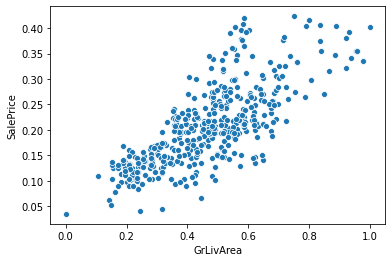

In [26]:
df['GrLivArea'] = MinMaxScaler().fit_transform(df['GrLivArea'].values.reshape(-1, 1))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)

#### BsmtFullBath | BsmtHalfBath | FullBath | HalfBath

Unique values in BsmtHalfBath: [0.]


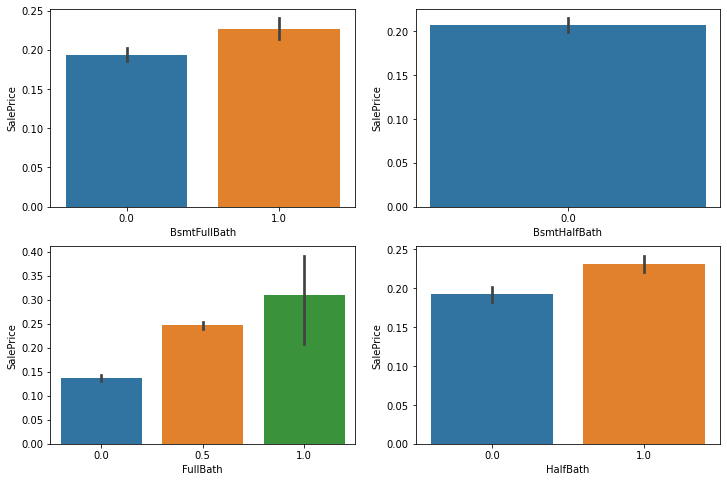

In [27]:
df['BsmtFullBath'] = MinMaxScaler().fit_transform(df['BsmtFullBath'].values.reshape(-1, 1))
df['BsmtHalfBath'] = MinMaxScaler().fit_transform(df['BsmtHalfBath'].values.reshape(-1, 1))
df['FullBath'] = MinMaxScaler().fit_transform(df['FullBath'].values.reshape(-1, 1))
df['HalfBath'] = MinMaxScaler().fit_transform(df['HalfBath'].values.reshape(-1, 1))

f, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

sns.barplot(x='BsmtFullBath', y='SalePrice', data=df, ax=ax[0, 0])
sns.barplot(x='BsmtHalfBath', y='SalePrice', data=df, ax=ax[0, 1])
sns.barplot(x='FullBath', y='SalePrice', data=df, ax=ax[1, 0])
sns.barplot(x='HalfBath', y='SalePrice', data=df, ax=ax[1, 1])

print(f'Unique values in BsmtHalfBath: {df.BsmtHalfBath.unique()}')
df.drop(['BsmtHalfBath'], axis='columns', inplace=True)

#### BedroomAbvGr | KitchenAbvGr | TotRmsAbvGrd

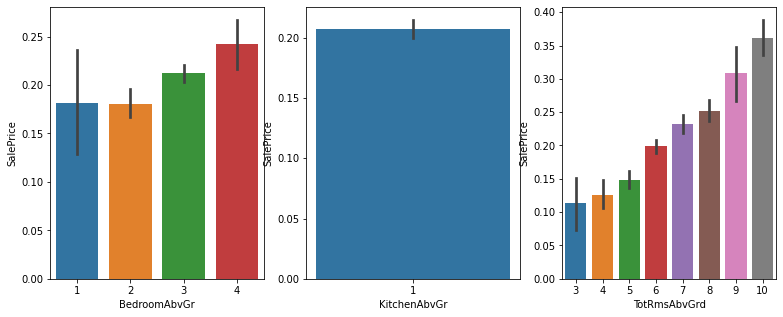

In [28]:
f, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(13, 5))

sns.barplot(x='BedroomAbvGr', y='SalePrice', data=df, ax=ax1)
sns.barplot(x='KitchenAbvGr', y='SalePrice', data=df, ax=ax2)
sns.barplot(x='TotRmsAbvGrd', y='SalePrice', data=df, ax=ax3)

new_values = {
    2: 0,
    1: 1,
    3: 2,
    4: 3
}
df.BedroomAbvGr = df.BedroomAbvGr.apply(lambda x: new_values[x])

df.drop(['KitchenAbvGr'], axis='columns', inplace=True)

#### Fireplaces

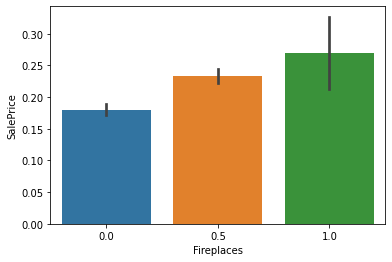

In [29]:
df['Fireplaces'] = MinMaxScaler().fit_transform(df['Fireplaces'].values.reshape(-1, 1))
sns.barplot(x='Fireplaces', y='SalePrice', data=df)

#### GarageYrBlt | GarageCars | GarageArea

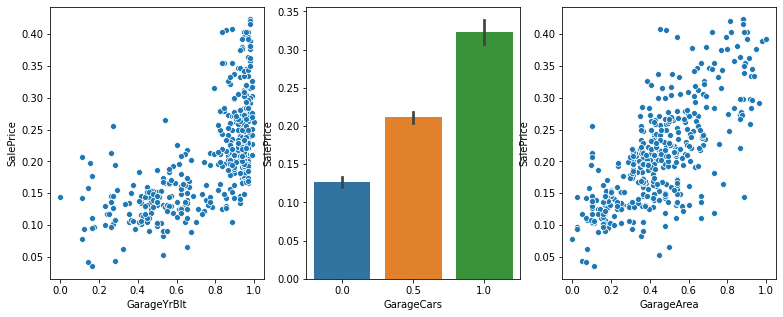

In [30]:
f, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(13, 5))

df['GarageYrBlt'] = MinMaxScaler().fit_transform(df['GarageYrBlt'].values.reshape(-1, 1))
df['GarageCars'] = MinMaxScaler().fit_transform(df['GarageCars'].values.reshape(-1, 1))
df['GarageArea'] = MinMaxScaler().fit_transform(df['GarageArea'].values.reshape(-1, 1))

sns.scatterplot(x='GarageYrBlt', y='SalePrice', data=df, ax=ax1)
sns.barplot(x='GarageCars', y='SalePrice', data=df, ax=ax2)
sns.scatterplot(x='GarageArea', y='SalePrice', data=df, ax=ax3)

#### GarageYrBlt | GarageArea

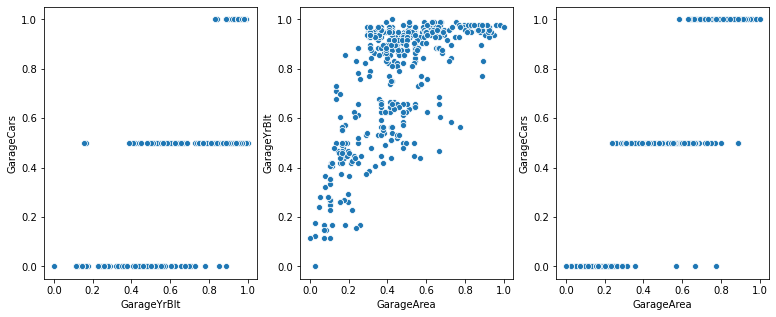

In [31]:
f, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(13, 5))

sns.scatterplot(x='GarageYrBlt', y='GarageCars', data=df, ax=ax1)
sns.scatterplot(x='GarageArea', y='GarageYrBlt', data=df, ax=ax2)

# Correlation between GarageArea and GarageCars
sns.scatterplot(x='GarageArea', y='GarageCars', data=df, ax=ax3)

Unique values in EnclosedPorch: [0]
Unique values in 3SsnPorch: [0]
Unique values in ScreenPorch: [0]


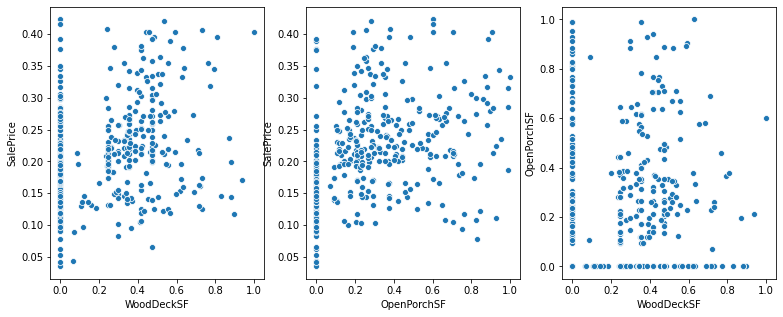

In [32]:
f, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(13, 5))

df['WoodDeckSF'] = MinMaxScaler().fit_transform(df['WoodDeckSF'].values.reshape(-1, 1))
df['OpenPorchSF'] = MinMaxScaler().fit_transform(df['OpenPorchSF'].values.reshape(-1, 1))

sns.scatterplot(x='WoodDeckSF', y='SalePrice', data=df, ax=ax1)
sns.scatterplot(x='OpenPorchSF', y='SalePrice', data=df, ax=ax2)

# Correlation between WoodDeckSF and OpenPorchSF
sns.scatterplot(x='WoodDeckSF', y='OpenPorchSF', data=df, ax=ax3)

print(f'Unique values in EnclosedPorch: {df.EnclosedPorch.unique()}')
df.drop(['EnclosedPorch'], axis='columns', inplace=True)

unq = df['3SsnPorch'].unique()
print(f'Unique values in 3SsnPorch: {unq}')
df.drop(['3SsnPorch'], axis='columns', inplace=True)

print(f'Unique values in ScreenPorch: {df.ScreenPorch.unique()}')
df.drop(['ScreenPorch'], axis='columns', inplace=True)

Unique values in PoolArea: [0]
Unique values in MiscVal: [0]


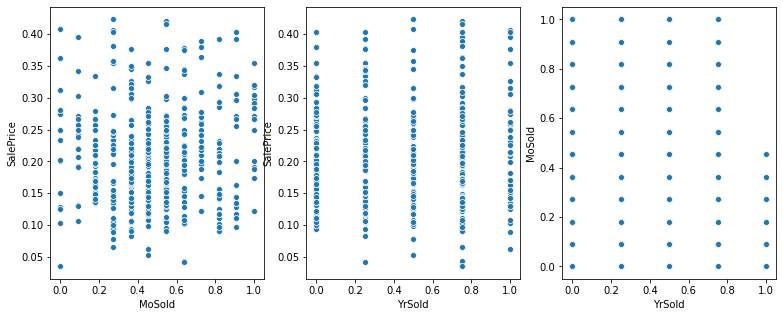

In [33]:
f, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(13, 5))

df['MoSold'] = MinMaxScaler().fit_transform(df['MoSold'].values.reshape(-1, 1))
df['YrSold'] = MinMaxScaler().fit_transform(df['YrSold'].values.reshape(-1, 1))

sns.scatterplot(x='MoSold', y='SalePrice', data=df, ax=ax1)
sns.scatterplot(x='YrSold', y='SalePrice', data=df, ax=ax2)

# Correlation between YrSold and MoSold
sns.scatterplot(x='YrSold', y='MoSold', data=df, ax=ax3)

print(f'Unique values in PoolArea: {df.PoolArea.unique()}')
df.drop(['PoolArea'], axis='columns', inplace=True)

print(f'Unique values in MiscVal: {df.MiscVal.unique()}')
df.drop(['MiscVal'], axis='columns', inplace=True)

<hr>

### Combining the modified df(numerical dataframe) to the data(main dataframe)

In [34]:
# Categorical data from data(main dataframe)
cat_df = data.loc[:, data.dtypes == object]
cat_df.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [35]:
data = df.copy()
data.head()

,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,0.378040,4,3,0.883333,0.472289,0.089820,0.267606,0.633062,0.582418,1.0,0.5,1.0,2,8,0.0,0.927083,0.5,0.505208,0.000000,0.358824,0.090909,0.50,0.241078
2,0.572620,4,3,0.866667,0.390361,0.259880,0.308579,0.641957,0.617216,1.0,0.5,1.0,2,6,0.5,0.906250,0.5,0.583333,0.000000,0.247059,0.727273,0.50,0.261908
4,0.781793,7,3,0.833333,0.843373,0.293413,0.452625,0.780578,0.805861,1.0,0.5,1.0,3,9,0.5,0.895833,1.0,0.880208,0.475248,0.494118,1.000000,0.50,0.298709
6,0.491591,7,3,0.916667,0.448193,0.189820,0.804097,0.000000,0.575092,1.0,0.5,0.0,2,7,0.5,0.937500,0.5,0.619792,0.631188,0.335294,0.636364,0.25,0.377864
10,0.569145,1,3,0.250000,0.000000,0.080240,0.385403,0.000000,0.275641,1.0,0.0,0.0,2,5,0.0,0.531250,0.0,0.291667,0.000000,0.000000,0.090909,0.50,0.131371


In [36]:
y = data[['SalePrice']]
y.head()

,SalePrice
0,0.241078
2,0.261908
4,0.298709
6,0.377864
10,0.131371


In [37]:
idx = data.index
cat_df = cat_df.loc[idx]
cat_df = pd.concat([cat_df, y], axis='columns')

# For convince of working
df = cat_df.copy()
df.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,0.241078
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,0.261908
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,0.298709
6,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,0.377864
10,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,Hip,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal,0.131371


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432 entries, 0 to 1455
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       432 non-null    object 
 1   Street         432 non-null    object 
 2   Alley          16 non-null     object 
 3   LotShape       432 non-null    object 
 4   LandContour    432 non-null    object 
 5   Utilities      432 non-null    object 
 6   LotConfig      432 non-null    object 
 7   LandSlope      432 non-null    object 
 8   Neighborhood   432 non-null    object 
 9   Condition1     432 non-null    object 
 10  Condition2     432 non-null    object 
 11  BldgType       432 non-null    object 
 12  HouseStyle     432 non-null    object 
 13  RoofStyle      432 non-null    object 
 14  RoofMatl       432 non-null    object 
 15  Exterior1st    432 non-null    object 
 16  Exterior2nd    432 non-null    object 
 17  MasVnrType     432 non-null    object 
 18  ExterQual

<hr>

# Analyzing Categorical Data

#### MSZoning

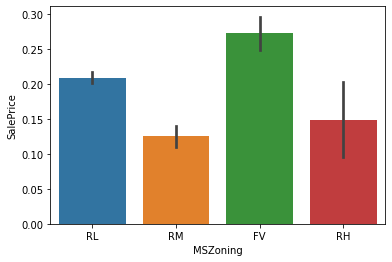

In [39]:
sns.barplot(x='MSZoning', y='SalePrice', data=df)

new_values = {
    'RL': 2,
    'RM': 0,
    'FV': 3,
    'RH': 1
}
df.MSZoning = df.MSZoning.apply(lambda x: new_values[x])

#### Street

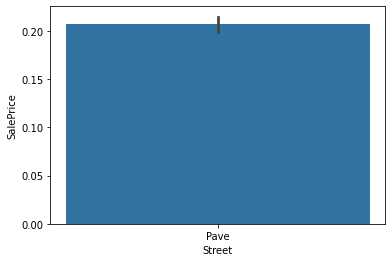

In [40]:
sns.barplot(x='Street', y='SalePrice', data=df)
df.drop(['Street'], axis='columns', inplace=True)

#### Alley

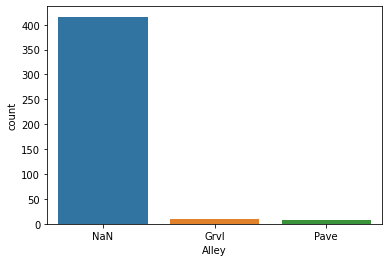

In [41]:
df.Alley = df.Alley.fillna('NaN')
sns.countplot(x='Alley', data=df)
df.drop(['Alley'], axis='columns', inplace=True)

#### LotShape

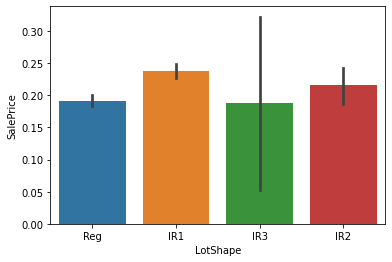

In [42]:
sns.barplot(x='LotShape', y='SalePrice', data=df)

new_values = {
    'Reg': 1,
    'IR1': 3,
    'IR3': 0,
    'IR2': 2
}
df.LotShape = df.LotShape.apply(lambda x: new_values[x])

#### LandContour

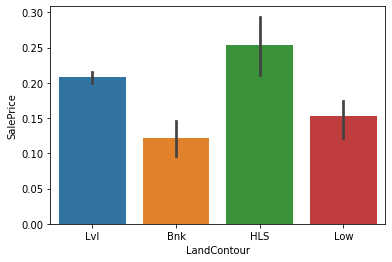

In [43]:
sns.barplot(x='LandContour', y='SalePrice', data=df)

new_values = {
    'Bnk': 0,
    'Lvl': 2,
    'Low': 1,
    'HLS': 3
}
df.LandContour = df.LandContour.apply(lambda x: new_values[x])

#### Utilities

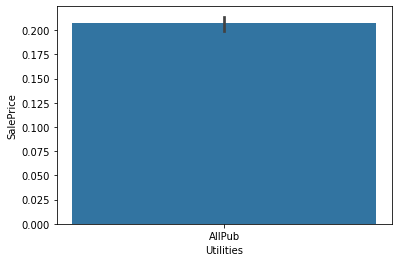

In [44]:
sns.barplot(x='Utilities', y='SalePrice', data=df)
df.drop(['Utilities'], axis='columns', inplace=True)

#### LotConfig

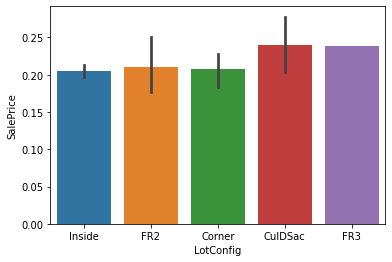

In [45]:
sns.barplot(x='LotConfig', y='SalePrice', data=df)

new_values = {
    'Inside': 0,
    'FR2': 1,
    'Corner': 0,
    'FR3': 2,
    'CulDSac': 2
}
df.LotConfig = df.LotConfig.apply(lambda x: new_values[x])

#### LandSlope

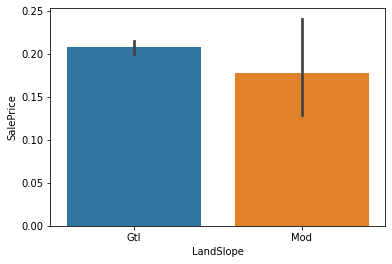

In [46]:
sns.barplot(x='LandSlope', y='SalePrice', data=df)

new_values = {
    'Gtl': 1,
    'Mod': 0,
}
df.LandSlope = df.LandSlope.apply(lambda x: new_values[x])

#### Neighborhood

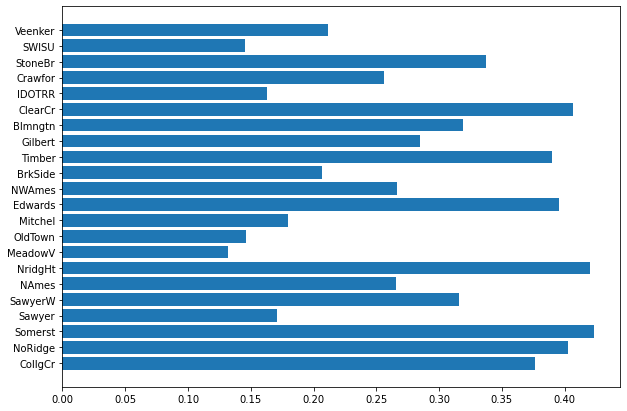

In [47]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
ax.barh(df.Neighborhood, df.SalePrice)

new_values = {
    'BrDale': 0,
    'Blueste': 1,
    'MeadowV': 0,
    'NPkVill': 1,
    'IDOTRR': 2,
    'Sawyer': 3,
    'SWISU': 1,
    'BrkSide': 5,
    'Blmngtn': 9,
    'Mitchel': 4,
    'NWAmes': 7,
    'Edwards': 13,
    'SawyerW': 9,
    'ClearCr': 14,
    'NAmes': 7,
    'Gilbert': 8,
    'Timber': 12,
    'Veenker': 5,
    'Crawfor': 6,
    'Somerst': 16,
    'CollgCr': 11,
    'OldTown': 1,
    'StoneBr': 10,
    'NridgHt': 15,
    'NoRidge': 14
}

df.Neighborhood = df.Neighborhood.apply(lambda x: new_values[x])

#### Condition1 | Condition2

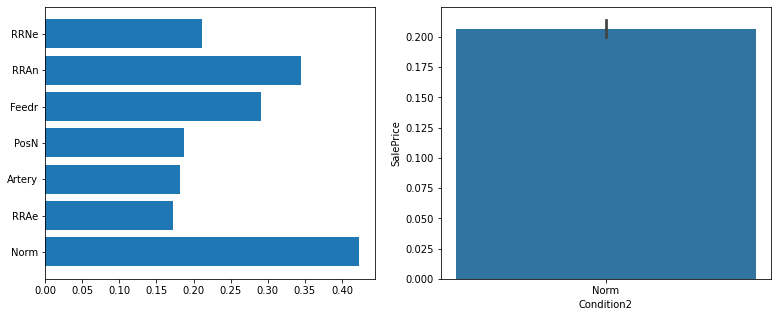

In [48]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

ax1.barh(df.Condition1, df.SalePrice)
sns.barplot(x='Condition2', y='SalePrice', data=df, ax=ax2)
df.drop(['Condition2'], axis='columns', inplace=True)

new_values = {
    'RRAe': 0,
    'RRNe': 3,
    'Feedr': 4,
    'PosN': 2,
    'RRAn': 5,
    'Artery': 1,
    'Norm': 6
}
df.Condition1 = df.Condition1.apply(lambda x: new_values[x])

#### BldgType | HouseStyle

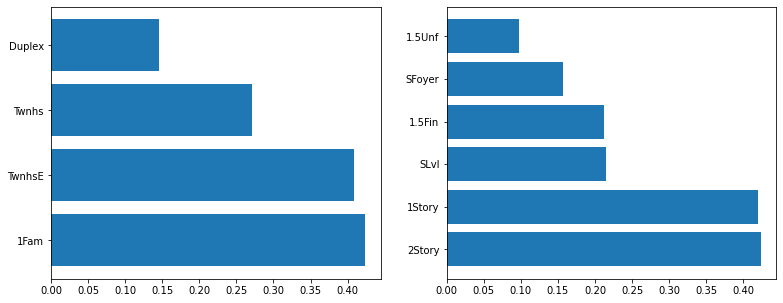

In [49]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

ax1.barh(df.BldgType, df.SalePrice)
ax2.barh(df.HouseStyle, df.SalePrice)

new_values = {
    'Duplex': 0,
    'Twnhs': 1,
    'TwnhsE': 2,
    '1Fam': 3
}
df.BldgType = df.BldgType.apply(lambda x: new_values[x])

new_values = {
    '1.5Unf': 0,
    'SFoyer': 1,
    'SLvl': 3,
    '1.5Fin': 2,
    '1Story': 4,
    '2Story': 5
}
df.HouseStyle = df.HouseStyle.apply(lambda x: new_values[x])

#### RoofStyle | RoofMatl

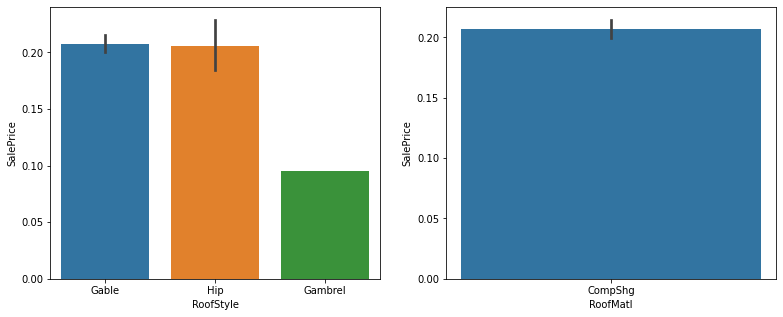

In [50]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

sns.barplot(x='RoofStyle', y='SalePrice', data=df, ax=ax1)
sns.barplot(x='RoofMatl', y='SalePrice', data=df, ax=ax2)
df.drop(['RoofMatl'], axis='columns', inplace=True)

new_values = {
    'Gambrel': 2,
    'Gable': 0,
    'Hip': 1
}
df.RoofStyle = df.RoofStyle.apply(lambda x: new_values[x])

#### Exterior1st | Exterior2nd

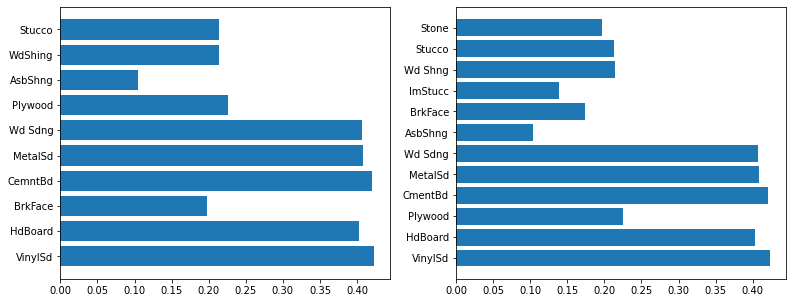

In [51]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

ax1.barh(df.Exterior1st, df.SalePrice)
ax2.barh(df.Exterior2nd, df.SalePrice)

new_values = {
    'AsbShng': 0,
    'BrkFace': 1,
    'Stucco': 2,
    'WdShing': 2,
    'Plywood': 3,
    'HdBoard': 4,
    'Wd Sdng': 5,
    'MetalSd': 6,
    'CemntBd': 7,
    'VinylSd': 8
}
df.Exterior1st = df.Exterior1st.apply(lambda x: new_values[x])

new_values = {
    'AsbShng': 0,
    'ImStucc': 1,
    'BrkFace': 2,
    'Stone': 3,
    'Stucco': 4,
    'Wd Shng': 5,
    'Plywood': 6,
    'HdBoard': 7,
    'Wd Sdng': 8,
    'MetalSd': 8,
    'CmentBd': 9,
    'VinylSd': 10
}
df.Exterior2nd = df.Exterior2nd.apply(lambda x: new_values[x])

#### MasVnrType

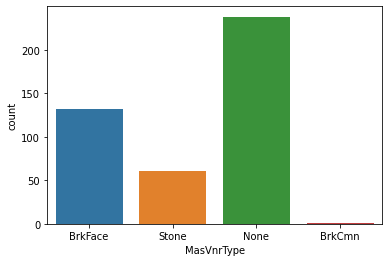

In [52]:
sns.countplot(x='MasVnrType', data=df)
df.drop(['MasVnrType'], axis='columns', inplace=True)

#### ExterQual | ExterCond

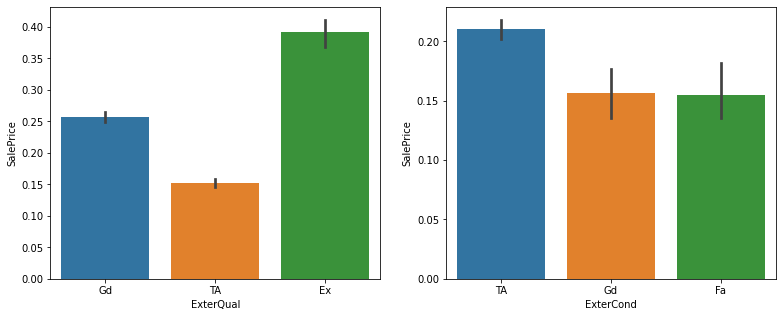

In [53]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

sns.barplot(x='ExterQual', y='SalePrice', data=df, ax=ax1)
sns.barplot(x='ExterCond', y='SalePrice', data=df, ax=ax2)

new_values = {
    'TA': 0,
    'Gd': 1,
    'Ex': 2
}
df.ExterQual = df.ExterQual.apply(lambda x: new_values[x])

new_values = {
    'Fa': 0,
    'Gd': 1,
    'TA': 2,
}
df.ExterCond = df.ExterCond.apply(lambda x: new_values[x])

#### Foundation

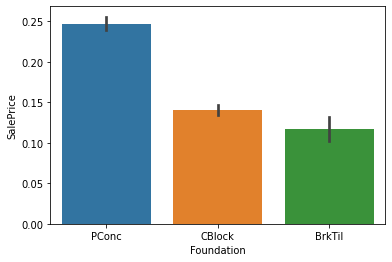

In [54]:
sns.barplot(x='Foundation', y='SalePrice', data=df)

new_values = {
    'BrkTil': 0,
    'CBlock': 1,
    'PConc': 2
}
df.Foundation = df.Foundation.apply(lambda x: new_values[x])

#### BsmtQual | BsmtCond | BsmtExposure | BsmtFinType1 | BsmtFinType2

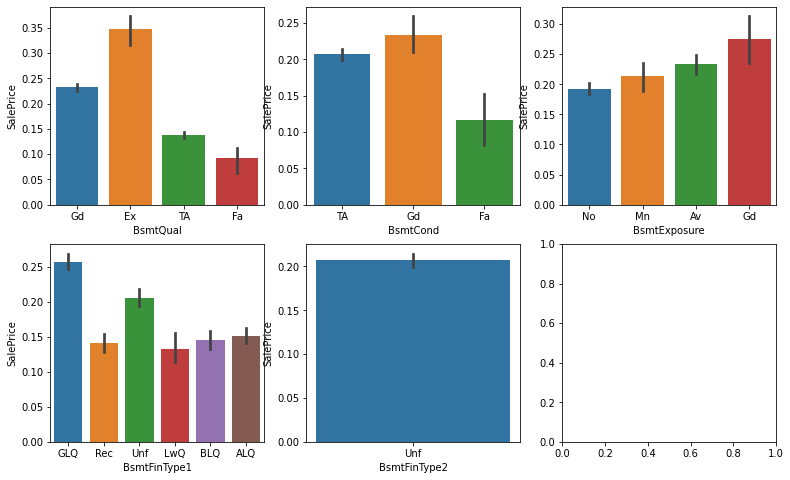

In [55]:
f, ax = plt.subplots(nrows=2, ncols=3, figsize=(13, 8))

sns.barplot(x='BsmtQual', y='SalePrice', data=df, ax=ax[0, 0])
sns.barplot(x='BsmtCond', y='SalePrice', data=df, ax=ax[0, 1])
sns.barplot(x='BsmtExposure', y='SalePrice', data=df, ax=ax[0, 2])
sns.barplot(x='BsmtFinType1', y='SalePrice', data=df, ax=ax[1, 0])
sns.barplot(x='BsmtFinType2', y='SalePrice', data=df, ax=ax[1, 1])

df.drop(['BsmtFinType2'], axis='columns', inplace=True)

new_values = {
    'Fa': 0,
    'TA': 1,
    'Gd': 2,
    'Ex': 3
}
df.BsmtQual = df.BsmtQual.apply(lambda x: new_values[x])

new_values = {
    'Fa': 0,
    'TA': 1,
    'Gd': 2
}
df.BsmtCond = df.BsmtCond.apply(lambda x: new_values[x])

df = df[pd.notna(df['BsmtExposure'])]
new_values = {
    'No': 0,
    'Mn': 1,
    'Av': 2,
    'Gd': 3
}
df
df.BsmtExposure = df.BsmtExposure.apply(lambda x: new_values[x])

new_values = {
    'LwQ': 0,
    'Rec': 1,
    'BLQ': 2,
    'ALQ': 3,
    'Unf': 4,
    'GLQ': 5
}
df.BsmtFinType1 = df.BsmtFinType1.apply(lambda x: new_values[x])

#### Heating | HeatingQC | CentralAir

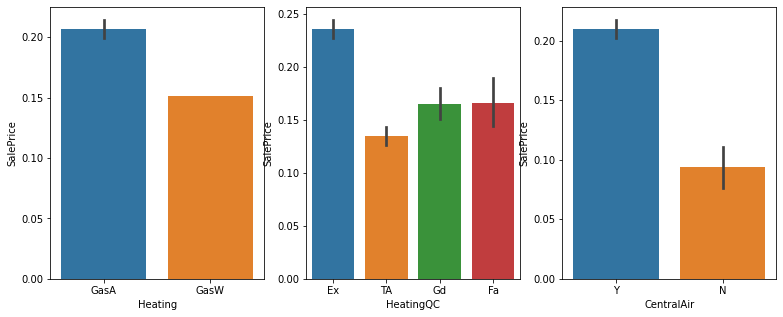

In [56]:
f, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(13, 5))

sns.barplot(x='Heating', y='SalePrice', data=df, ax=ax1)
sns.barplot(x='HeatingQC', y='SalePrice', data=df, ax=ax2)
sns.barplot(x='CentralAir', y='SalePrice', data=df, ax=ax3)

new_values = {
    'GasW': 0,
    'GasA': 1
}
df.Heating = df.Heating.apply(lambda x: new_values[x])

new_values = {
    'TA': 0,
    'Gd': 1,
    'Fa': 1,
    'Ex': 2
}
df.HeatingQC = df.HeatingQC.apply(lambda x: new_values[x])

new_values = {
    'N': 0,
    'Y': 1
}
df.CentralAir = df.CentralAir.apply(lambda x: new_values[x])

#### Electrical

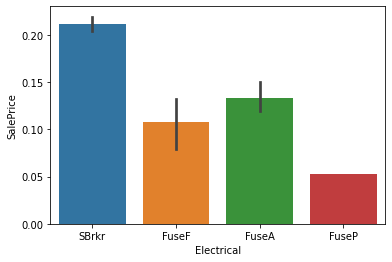

In [57]:
df = df[df['Electrical'].notna()]
sns.barplot(x='Electrical', y='SalePrice', data=df)

new_values = {
    'FuseP': 0,
    'FuseF': 1,
    'FuseA': 2,
    'SBrkr': 3
}
df.Electrical = df.Electrical.apply(lambda x: new_values[x])

#### KitchenQual

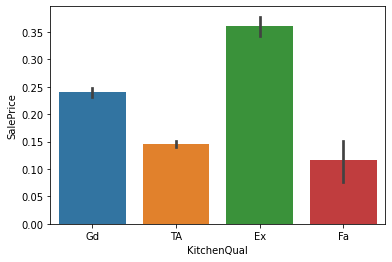

In [58]:
sns.barplot(x='KitchenQual', y='SalePrice', data=df)

new_values = {
    'Fa': 0,
    'TA': 1,
    'Gd': 2,
    'Ex': 3
}
df.KitchenQual = df.KitchenQual.apply(lambda x: new_values[x])

#### Functional

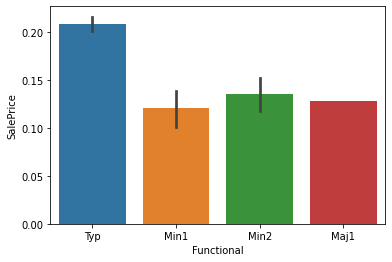

In [59]:
sns.barplot(x='Functional', y='SalePrice', data=df)

new_values = {
    'Min1': 0,
    'Maj1': 1,
    'Min2': 2,
    'Typ': 3
}
df.Functional = df.Functional.apply(lambda x: new_values[x])

#### FireplaceQu

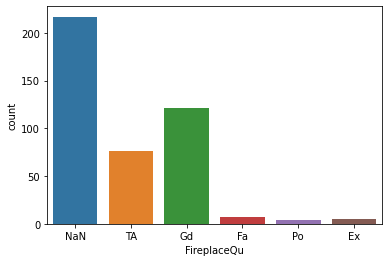

In [60]:
df.FireplaceQu = df.FireplaceQu.fillna('NaN')
sns.countplot(x='FireplaceQu', data=df)
df.drop(['FireplaceQu'], axis='columns', inplace=True)

#### GarageType | GarageFinish | GarageQual | GarageCond | PavedDrive

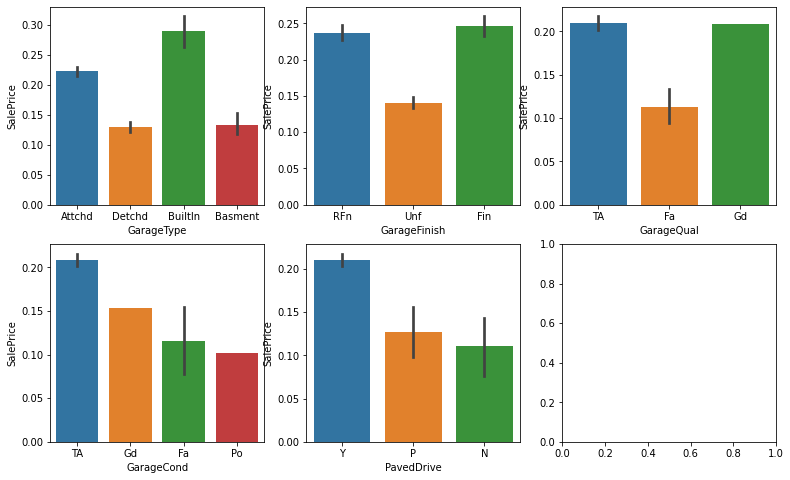

In [61]:
f, ax = plt.subplots(nrows=2, ncols=3, figsize=(13, 8))

sns.barplot(x='GarageType', y='SalePrice', data=df, ax=ax[0, 0])

sns.barplot(x='GarageFinish', y='SalePrice', data=df, ax=ax[0, 1])

df = df[df['GarageQual'].notna()]
sns.barplot(x='GarageQual', y='SalePrice', data=df, ax=ax[0, 2])

df = df[df['GarageCond'].notna()]
sns.barplot(x='GarageCond', y='SalePrice', data=df, ax=ax[1, 0])

sns.barplot(x='PavedDrive', y='SalePrice', data=df, ax=ax[1, 1])

In [62]:
new_values = {
    'Detchd': 0,
    'Basment': 1,
    'Attchd': 2,
    'BuiltIn': 3
}
df.GarageType = df.GarageType.apply(lambda x: new_values[x])

new_values = {
    'Unf': 0,
    'RFn': 1,
    'Fin': 2,
}
df.GarageFinish = df.GarageFinish.apply(lambda x: new_values[x])

new_values = {
    'Fa': 0,
    'TA': 2,
    'Gd': 1,
}
df.GarageQual = df.GarageQual.apply(lambda x: new_values[x])

new_values = {
    'Po': 0,
    'Fa': 1,
    'Gd': 2,
    'TA': 3
}
df.GarageCond = df.GarageCond.apply(lambda x: new_values[x])

new_values = {
    'N': 0,
    'P': 1,
    'Y': 2
}
df.PavedDrive = df.PavedDrive.apply(lambda x: new_values[x])

#### Fence | MiscFeature | PoolQC

Series([], Name: PoolQC, dtype: int64)


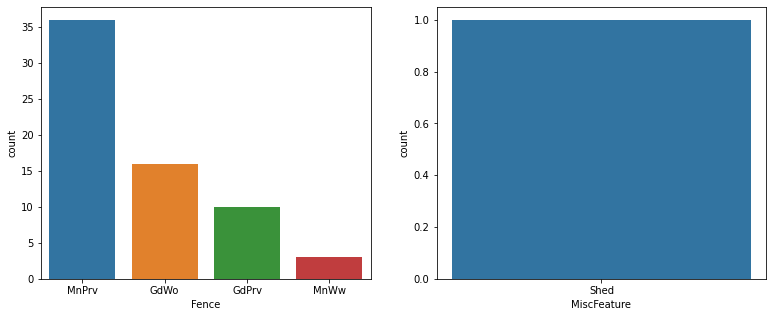

In [63]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

sns.countplot(x='Fence', data=df, ax=ax1)
sns.countplot(x='MiscFeature', data=df, ax=ax2)

# PoolQC is completely filled with NaN 
print(df.PoolQC.value_counts())

df['Fence'].fillna('None', inplace=True)
df['MiscFeature'].fillna('None', inplace=True)
df['PoolQC'].fillna('None', inplace=True)

df.drop(['Fence', 'MiscFeature', 'PoolQC'], axis='columns', inplace=True)

#### SaleType | SaleCondition

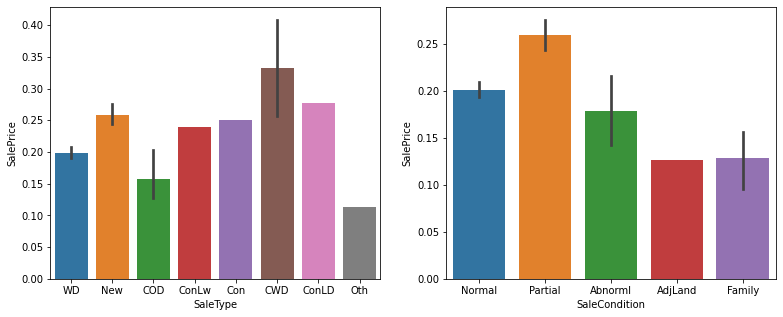

In [64]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

sns.barplot(x='SaleType', y='SalePrice', data=df, ax=ax1)
sns.barplot(x='SaleCondition', y='SalePrice', data=df, ax=ax2)

new_values = {
    'Oth': 0,
    'COD': 1,
    'WD': 2,
    'ConLw': 3,
    'Con': 4,
    'New': 5,
    'ConLD': 6,
    'CWD': 7
}
df.SaleType = df.SaleType.apply(lambda x: new_values[x])

new_values = {
    'AdjLand': 0,
    'Family': 1,
    'Abnorml': 2,
    'Normal': 3,
    'Partial': 4
}
df.SaleCondition = df.SaleCondition.apply(lambda x: new_values[x])

In [65]:
df.head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,2,1,2,0,1,11,6,3,5,0,8,10,1,2,2,2,1,0,5,1,2,1,3,2,3,2,1,2,3,2,2,3,0.241078
2,2,3,2,0,1,11,6,3,5,0,8,10,1,2,2,2,1,1,5,1,2,1,3,2,3,2,1,2,3,2,2,3,0.261908
4,2,3,2,1,1,14,6,3,5,0,8,10,1,2,2,2,1,2,5,1,2,1,3,2,3,2,1,2,3,2,2,3,0.298709
6,2,1,2,0,1,16,6,3,4,0,8,10,1,2,2,3,1,2,5,1,2,1,3,2,3,2,1,2,3,2,2,3,0.377864
10,2,1,2,0,1,3,6,3,4,1,4,7,0,2,1,1,1,0,1,1,2,1,3,1,3,0,0,2,3,2,2,3,0.131371


<hr>

## Combining categorical preprocessed data to main dataframe

In [66]:
data.drop(['SalePrice'], axis='columns', inplace=True)
df.drop(['SalePrice'], axis='columns', inplace=True)

idx = df.index
data = data.loc[idx]
y_df = y_df.loc[idx]

data = pd.concat([data, df, y_df], axis='columns')
df.reset_index(inplace=True, drop=True)
data.head()

,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,0.378040,4,3,0.883333,0.472289,0.089820,0.267606,0.633062,0.582418,1.0,0.5,1.0,2,8,0.0,0.927083,0.5,0.505208,0.000000,0.358824,0.090909,0.50,2,1,2,0,1,11,6,3,5,0,8,10,1,2,2,2,1,0,5,1,2,1,3,2,3,2,1,2,3,2,2,3,208500
2,0.572620,4,3,0.866667,0.390361,0.259880,0.308579,0.641957,0.617216,1.0,0.5,1.0,2,6,0.5,0.906250,0.5,0.583333,0.000000,0.247059,0.727273,0.50,2,3,2,0,1,11,6,3,5,0,8,10,1,2,2,2,1,1,5,1,2,1,3,2,3,2,1,2,3,2,2,3,223500
4,0.781793,7,3,0.833333,0.843373,0.293413,0.452625,0.780578,0.805861,1.0,0.5,1.0,3,9,0.5,0.895833,1.0,0.880208,0.475248,0.494118,1.000000,0.50,2,3,2,1,1,14,6,3,5,0,8,10,1,2,2,2,1,2,5,1,2,1,3,2,3,2,1,2,3,2,2,3,250000
6,0.491591,7,3,0.916667,0.448193,0.189820,0.804097,0.000000,0.575092,1.0,0.5,0.0,2,7,0.5,0.937500,0.5,0.619792,0.631188,0.335294,0.636364,0.25,2,1,2,0,1,16,6,3,4,0,8,10,1,2,2,3,1,2,5,1,2,1,3,2,3,2,1,2,3,2,2,3,307000
10,0.569145,1,3,0.250000,0.000000,0.080240,0.385403,0.000000,0.275641,1.0,0.0,0.0,2,5,0.0,0.531250,0.0,0.291667,0.000000,0.000000,0.090909,0.50,2,1,2,0,1,3,6,3,4,1,4,7,0,2,1,1,1,0,1,1,2,1,3,1,3,0,0,2,3,2,2,3,129500


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 0 to 1455
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        430 non-null    float64
 1   OverallQual    430 non-null    int64  
 2   OverallCond    430 non-null    int64  
 3   YearRemodAdd   430 non-null    float64
 4   MasVnrArea     430 non-null    float64
 5   BsmtUnfSF      430 non-null    float64
 6   1stFlrSF       430 non-null    float64
 7   2ndFlrSF       430 non-null    float64
 8   GrLivArea      430 non-null    float64
 9   BsmtFullBath   430 non-null    float64
 10  FullBath       430 non-null    float64
 11  HalfBath       430 non-null    float64
 12  BedroomAbvGr   430 non-null    int64  
 13  TotRmsAbvGrd   430 non-null    int64  
 14  Fireplaces     430 non-null    float64
 15  GarageYrBlt    430 non-null    float64
 16  GarageCars     430 non-null    float64
 17  GarageArea     430 non-null    float64
 18  WoodDeckS

<hr>

# Creating Model

#### Scaling data

In [68]:
from sklearn.preprocessing import StandardScaler

for col in data.columns:
    # Not scaling the traget (this has no effect on out prediction)
    if col != 'SalePrice':
        data[f'{col}'] = StandardScaler().fit_transform(data[f'{col}'].values.reshape(-1, 1))

In [69]:
cols = data.columns.tolist()
cols.remove('SalePrice')

X = np.array(data[cols].values)
y = np.array(data['SalePrice'].values.reshape(-1, 1))

In [70]:
X[:5]

array([[-0.29784809,  0.27445224,  0.56397748,  0.64746289,  1.06364175,
        -1.17989145, -0.94759325,  1.30575395,  0.69241143,  1.1955662 ,
         0.72218117,  1.26730446,  0.42207905,  1.25810661, -0.95294795,
         0.70978784,  0.1619289 ,  0.27430256, -0.93451757,  0.36925232,
        -1.65174124,  0.18327478,  0.13792905, -0.69941387,  0.07460799,
        -0.28673117,  0.15430335,  0.33076091,  0.2926049 ,  0.29618184,
         1.0084546 , -0.45239041,  0.76794094,  0.73610057,  0.90947676,
         0.25354533,  0.71321534,  0.47536452, -0.10669559, -0.67578816,
         0.89678623,  0.04828045,  0.65162667,  0.16202772,  0.21907533,
         0.61627951,  0.1319966 ,  0.40842986,  0.07114305,  0.18178212,
         0.13350031,  0.17471326, -0.38201213, -0.11415049],
       [ 0.78975248,  0.27445224,  0.56397748,  0.59743431,  0.75372381,
        -0.52374249, -0.72935283,  1.33463971,  0.89131797,  1.1955662 ,
         0.72218117,  1.26730446,  0.42207905, -0.29868718,  0.

In [71]:
y[:5]

array([[208500],
       [223500],
       [250000],
       [307000],
       [129500]])

#### Splitting dataset

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#### Cross Validation

In [73]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=10)
score = cross_val_score(Ridge(), X_train, y_train, cv=kf)
score.mean()

0.848981882511981

#### Parameter Tuning

In [74]:
from sklearn.model_selection import GridSearchCV

def find_best_params(X, y, cv=10):
    alpha = [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300]
    solver = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
    
    params = {
        'alpha': alpha,
        'solver': solver
    }
    
    grid_search = GridSearchCV(Ridge(), param_grid=params, cv=cv, n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_params_

find_best_params(X_train, y_train, kf)

{'alpha': 30, 'solver': 'sparse_cg'}

#### Learning Curve

In [75]:
from sklearn.model_selection import learning_curve

_size = np.arange(0.01, 1.01, 0.01)
train_sizes = np.array(_size)
scoring = 'neg_mean_squared_error'

train_sizes_abs, train_scores, cv_scores = learning_curve(Ridge(alpha=30, solver='sparse_cg'), X_train, y_train, train_sizes=train_sizes, cv=kf, scoring=scoring)

In [76]:
train_scores_mean = []
for row in train_scores:
    _mean = row.mean()
    train_scores_mean.append(_mean)
    
cv_scores_mean = []
for row in cv_scores:
    _mean = row.mean()
    cv_scores_mean.append(_mean)    
    
train_scores_mean = -np.array(train_scores_mean)
cv_scores_mean = -np.array(cv_scores_mean)

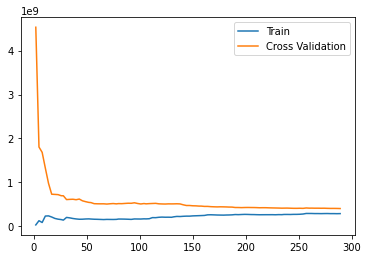

In [77]:
plt.plot(train_sizes_abs, train_scores_mean, label='Train')
plt.plot(train_sizes_abs, cv_scores_mean, label='Cross Validation')

plt.legend()

#### Fitting the model

In [78]:
model = Ridge(alpha=30, solver='sparse_cg')
model.fit(X_train, y_train)

Ridge(alpha=30, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='sparse_cg', tol=0.001)

#### Optimal Parameters

In [79]:
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients: ", coefficients)
print("Intercept: ", model.intercept_)

Coefficients:  [[ 2.60947411e+03  7.24342230e+03 -1.72842831e+03  6.00252828e+02
   1.08473315e+03 -5.19620147e+03  1.01330068e+04  5.69669029e+03
   1.39708923e+04  3.31063290e+03 -1.32778550e+03 -5.91557003e+02
  -2.12456102e+03  1.41797881e+03  2.34622625e+03 -1.45174751e+03
   1.64872836e+03  7.02327731e+03  5.68306924e+02  2.18341770e+03
   8.75060029e+01  8.89090801e+02  2.54768985e+03  3.08767154e+02
  -7.59284937e+01  1.88209622e+03 -6.33864449e+02  1.74952604e+03
   1.75475760e+03  6.76346612e+02  1.61569608e+03  3.62159965e+02
   1.48795887e+03 -1.94910534e+02  2.70055108e+03  1.62598487e+03
   1.63887693e+03  8.40512897e+03  7.90757729e+02  2.10758487e+03
   1.54996154e+03 -7.47844153e+02  5.33987633e+02  1.10096561e+02
   1.63160518e+00  6.40084058e+03  1.88726880e+03 -8.05820698e+02
  -9.90852481e+02  1.17137294e+03  1.46061609e+03 -6.12427628e+02
   4.15275465e+03  8.62255732e+01]]
Intercept:  [183251.12950784]


#### Predicting

In [80]:
y_test_pred = model.predict(X_test)
y_test_pred

array([[209647.60838383],
       [239312.74271952],
       [208620.9690508 ],
       [104480.36565976],
       [274216.3487888 ],
       [206414.74401422],
       [164250.06232698],
       [122888.35133011],
       [215584.57670749],
       [ 81625.12904577],
       [108177.13021111],
       [ 52696.92305905],
       [112644.91192752],
       [143638.83133976],
       [216127.58061952],
       [ 80820.29553468],
       [217462.79804939],
       [209123.78521511],
       [200747.12900643],
       [186144.90627078],
       [196734.21001463],
       [148353.3991364 ],
       [117818.2969482 ],
       [226112.99000548],
       [168720.9281812 ],
       [131635.80836362],
       [147263.90898211],
       [125577.23250527],
       [127766.33817707],
       [256548.0317631 ],
       [202599.83614319],
       [298497.80650276],
       [117868.91835134],
       [130351.04680491],
       [286857.46862614],
       [233990.4536257 ],
       [221507.15682662],
       [112196.98274324],
       [2310

#### Evaluating Model

In [81]:
from sklearn.metrics import mean_squared_error, r2_score

In [82]:
# *** Out-Of-Sample Forecast ***

# To see how our model performs on data that model has NOT seen

rms_error = mean_squared_error(y_test, y_test_pred, squared=False)
r2_score_value = r2_score(y_test, y_test_pred)

print(f"Root mean squared error: {rms_error}")
print(f"R2-score: {r2_score_value}")

Root mean squared error: 18814.92112298919
R2-score: 0.8972175080335503


#### Pipeline

In [83]:
from sklearn.pipeline import Pipeline

In [84]:
scaling = ('scale', StandardScaler())
model = ('model', Ridge(alpha=30, solver='sparse_cg'))

# Steps in the pipeline
steps = [scaling, model]

pipe = Pipeline(steps=steps)

# Fiitting the model
model = pipe.fit(X_train, y_train)

# Out-Of-Sample Forecast
y_test_pred = model.predict(X_test)

# Evaluation
rms_error = mean_squared_error(y_test, y_test_pred, squared=False)
r2_score_value = r2_score(y_test, y_test_pred)

print(f"Root mean squared error: {rms_error}")
print(f"R2-score: {r2_score_value}")

Root mean squared error: 18803.43759771317
R2-score: 0.8973429345651959


#### Saving the model

In [85]:
from joblib import dump, load

dump(model, 'model.joblib') 

['model.joblib']

#### Visualizing our prediction against actual values

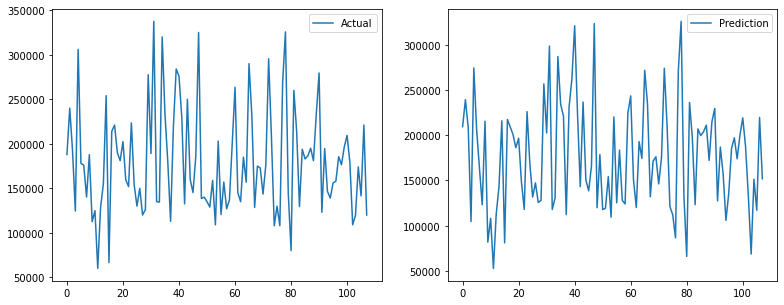

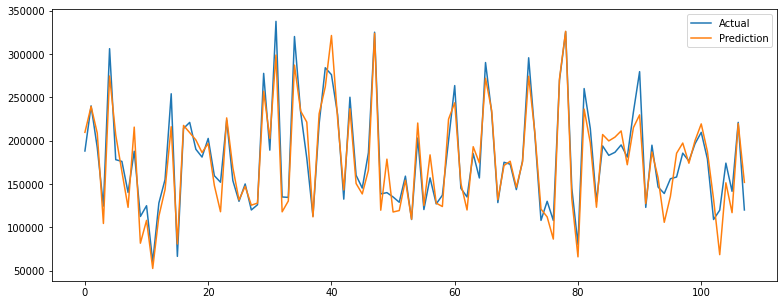

In [86]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

ax1.plot(np.arange(len(y_test)), y_test, label='Actual')
ax2.plot(np.arange(len(y_test_pred)), y_test_pred, label='Prediction')

ax1.legend()
ax2.legend()

f, ax3 = plt.subplots(nrows=1, ncols=1, figsize=(13, 5))

ax3.plot(np.arange(len(y_test)), y_test, label='Actual')
ax3.plot(np.arange(len(y_test_pred)), y_test_pred, label='Prediction')

ax3.legend()

<hr>